<a href="https://colab.research.google.com/github/vinarestanti/Praktikum-SPK/blob/main/Fuzzy_CMeans_G_231_22_0044.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Install library scikit-fuzzy
!pip install -q scikit-fuzzy --upgrade

# 2. Import library yang dibutuhkan
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files

# 3. Upload file CSV (manual via Google Colab)
uploaded = files.upload()


Saving UCI_Credit_Card_fixed.csv to UCI_Credit_Card_fixed.csv


In [ ]:
base = pd.read_csv('UCI_Credit_Card_fixed.csv')
print(base.shape)

(30000, 25)


In [ ]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [ ]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [ ]:
X = base[['LIMIT_BAL', 'BILL_TOTAL']].values

# Tampilkan beberapa baris pertama dari X
print("1 X")
print(X[:5])

1 X
[[ 20000.   7704.]
 [120000.  17077.]
 [ 90000. 101653.]
 [ 50000. 231334.]
 [ 50000. 109339.]]


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Tampilkan hasil setelah scaling
print("\n2 X")
print(X[:5])


2 X
[[-1.13672015 -0.69069198]
 [-0.3659805  -0.66599747]
 [-0.59720239 -0.44316987]
 [-0.90549825 -0.10150668]
 [-0.90549825 -0.42292   ]]


In [ ]:
print("\nX.shape")
print(X.shape)

print("\nX.T.shape")
print(X.T.shape)



X.shape
(30000, 2)

X.T.shape
(2, 30000)


In [ ]:
import skfuzzy as fuzz

# Menjalankan Fuzzy C-Means
r = fuzz.cmeans(
    data=X.T,
    c=3,
    m=2,
    error=0.005,
    maxiter=1000,
    init=None
)

# Menampilkan hasil
print("1 r")
print(r)


1 r
(array([[-0.73888691, -0.30174099],
       [ 0.74970803,  2.01633285],
       [ 0.97535857, -0.4205529 ]]), array([[0.91181755, 0.84865108, 0.97914488, ..., 0.95010613, 0.95613054,
        0.97292084],
       [0.02592702, 0.02732506, 0.00499036, ..., 0.0149197 , 0.01406235,
        0.00906558],
       [0.06225544, 0.12402386, 0.01586475, ..., 0.03497418, 0.02980711,
        0.01801358]]), array([[0.16970116, 0.00527329, 0.02056775, ..., 0.27887135, 0.45909922,
        0.58312696],
       [0.52955465, 0.08223653, 0.2923061 , ..., 0.29085813, 0.05127774,
        0.30926868],
       [0.30074419, 0.91249018, 0.68712615, ..., 0.43027052, 0.48962304,
        0.10760435]]), array([[0.55637591, 0.52128876, 0.20019148, ..., 0.39095539, 0.3002117 ,
        0.25955587],
       [3.299484  , 2.90510874, 2.80416142, ..., 3.11984678, 2.47546768,
        2.68888209],
       [2.1292843 , 1.36361048, 1.5727236 , ..., 2.03769659, 1.7003029 ,
        1.90752222]]), array([25707.87759013, 19998.6221321

In [ ]:
previsoes_porcentagem = r[1]



In [ ]:
print(previsoes_porcentagem.shape)

(3, 30000)


In [ ]:
print(previsoes_porcentagem)

[[0.91181755 0.84865108 0.97914488 ... 0.95010613 0.95613054 0.97292084]
 [0.02592702 0.02732506 0.00499036 ... 0.0149197  0.01406235 0.00906558]
 [0.06225544 0.12402386 0.01586475 ... 0.03497418 0.02980711 0.01801358]]


In [ ]:
print(previsoes_porcentagem[0][0])

0.9118175483057146


In [ ]:
print(previsoes_porcentagem[1][0])

0.025927015668604128


In [ ]:
print(previsoes_porcentagem[2][0])

0.06225543602568121


In [ ]:
# Menjumlahkan ketiga nilai keanggotaan untuk data ke-0 (harusnya hasil = 1.0)
total = previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]
print(total)


0.9999999999999999


In [ ]:
# Mengambil indeks cluster dengan nilai keanggotaan tertinggi untuk setiap data
previsoes = previsoes_porcentagem.argmax(axis=0)
print(previsoes)


[0 0 0 ... 0 0 0]


In [ ]:
print(previsoes[5000])


0


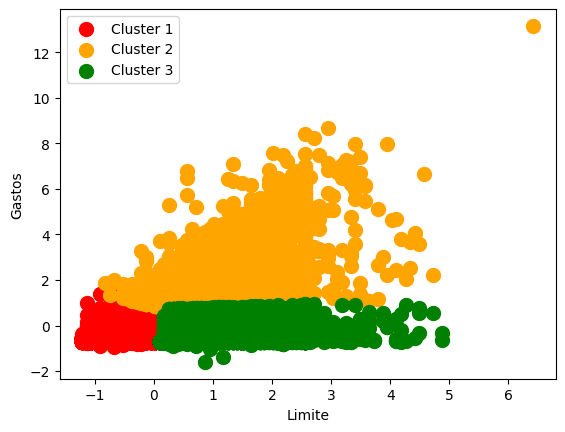

In [ ]:
# Visualisasi hasil clustering
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s=100, c='green', label='Cluster 3')

plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()
plt.show()